In [90]:
import numpy as np
import scipy as sp
from scipy import linalg
import matplotlib
from matplotlib import pyplot as pl

We define the Hamiltonian \
$$ H(t) = H_0 + W(t) = - J \sigma_ x + \Delta \cos(\omega t) \sigma_z $$

In [91]:
def hamiltonian(J, Delta, omega, t):
    ham = -J * np.array([[0,1],[1,0]]) + Delta * np.cos(omega*t) * np.array([[1,0],[0,-1]])
    return ham

In [92]:
J = 1
Delta = 1
print(hamiltonian(J, Delta, 0, 0))

[[ 1. -1.]
 [-1. -1.]]


Consider the initial state $|\psi(0)\rangle = (1,0)$: spin up along the z axis

In [93]:
psi0 = np.array([1.,0])

The time evolution operator is \
$$ U(t,t_0) = \mathcal{T} \exp{\left(-i \int_{t_0}^t \mathrm d t \, H(t) \right)} \approx e^{-i \Delta t_N H(t_N)} \cdots e^{-i \Delta t_1 H(t_1)}$$
where we used the Trotter decomposition for $\Delta t_i \rightarrow 0$. Notice that the Hamiltonian at different times may not commute, so the time ordering is reflected in the sequence of exponential operators.

In [94]:
def U(dt, J, Delta, omega, t):
    val = sp.linalg.expm(-1j * dt * hamiltonian(J, Delta, omega, t))
    return val

In [95]:
dt = 0.01
U(dt, J, Delta, 0, 0)

array([[9.99900002e-01-0.00999967j, 2.10962328e-21+0.00999967j],
       [3.25168766e-21+0.00999967j, 9.99900002e-01+0.00999967j]])

Let us consider the evolution under $H_0$. In this case $H(t) = H_0$ is time independent, so we don't need to compute $U(t,0)$ at each time. The state at each time is $|\psi(t)\rangle = U(t,0) |\psi(t)\rangle$, where $|\psi(t)\rangle = (c_1(t), c_2(t))$.

In [116]:
t_start = 0
t_stop = 10
dt = 0.01
t_list = np.arange(t_start,t_stop,dt) # Time list

In [117]:
psit = []
psi = psi0 # Initial state
psit.append(psi0)
for t in t_list[1:]:
    psi = np.dot(U(dt, J, 0., 0, 0), psi) # Apply the time evolution operator (Trotter)
    psit.append(psi)

We compute the expectation value of the spin operator along $z$, namely
$$ \langle \psi(t) | \sigma_z | \psi(t) \rangle = |c_1(t)|^2 - |c_2(t)|^2$$

In [118]:
sz = [np.abs(psi[0])**2 - np.abs(psi[1])**2 for psi in psit] # Average value of sigma_z

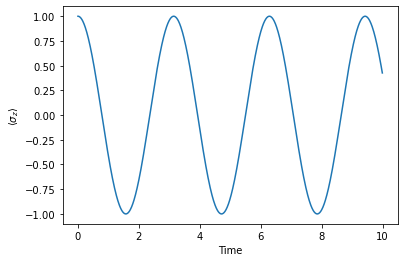

In [119]:
pl.figure()
pl.plot(t_list, sz)
pl.xlabel('Time')
pl.ylabel(r'$\langle \sigma_z \rangle$')
pl.show()

Let us check if the Trotter decomposition fails when $\Delta t$ is not too small:

In [120]:
t_start = 0
t_stop = 10
dt = 0.5 # Large time step
t_list2 = np.arange(t_start,t_stop,dt) # Time list

psit2 = []
psi = psi0 # Initial state
psit2.append(psi0)
for t in t_list2[1:]:
    psi = np.dot(U(dt, J, 0., 0, 0), psi) # Apply the time evolution operator (Trotter)
    psit2.append(psi)

sz2 = [np.abs(psi[0])**2 - np.abs(psi[1])**2 for psi in psit2] # Average value of sigma_z

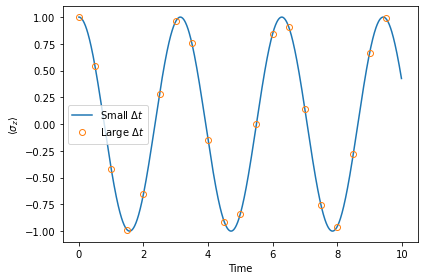

In [122]:
pl.figure()
pl.plot(t_list, sz, label = r'Small $\Delta t$')
pl.plot(t_list2, sz2, 'o', fillstyle = 'none', label = r'Large $\Delta t$')
pl.xlabel('Time')
pl.ylabel(r'$\langle \sigma_z \rangle$')
pl.legend()
pl.tight_layout()
pl.show()

The agreement is perfect, what is the reason?

### Adding the drive

We now compute the time evolution under the time-dependent drive

In [246]:
omega = 10.
Delta = 2.

With this parameter the effective Hamiltonian is $H_{\mathrm{eff}} \approx H_0 (1 - \Delta^2 / \omega^2)$, namely with a renormalization of $J \rightarrow J_{\mathrm{eff}}$.

In [247]:
Jeff = J*(1-Delta**2/omega**2)
print(Jeff)

0.96


The period of the drive is $T = 2\pi/\omega$

In [248]:
2*np.pi/omega # Period of the drive

0.6283185307179586

In [249]:
t_start = 0
t_stop = 10
dt = 0.001 # We choose it much smaller than the driving period
t_drive_list = np.arange(t_start,t_stop,dt) # Time list

psit_drive = []
psit_eff = []
psi = psi0 # Initial state
psieff = psi0
psit_drive.append(psi0)
psit_eff.append(psi0)
for t in t_drive_list[1:]:
    psi = np.dot(U(dt, J, Delta, omega, t), psi) # Apply the time evolution operator (Trotter)
    psieff = np.dot(U(dt, Jeff, 0., 0., 0.), psieff) # Effective dynamics
    psit_drive.append(psi)
    psit_eff.append(psieff)

sz_drive = [np.abs(psi[0])**2 - np.abs(psi[1])**2 for psi in psit_drive] 
sz_eff = [np.abs(psi[0])**2 - np.abs(psi[1])**2 for psi in psit_eff] 

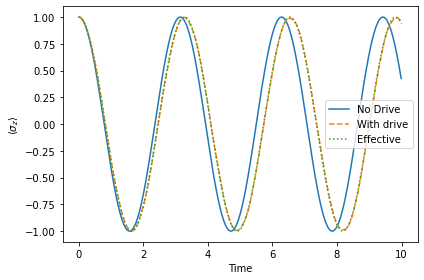

In [250]:
pl.figure()
pl.plot(t_list, sz, label = r'No Drive')
pl.plot(t_drive_list, sz_drive, '--', label = r'With drive')
pl.plot(t_drive_list, sz_eff, ':', label = r'Effective')
pl.xlabel('Time')
pl.ylabel(r'$\langle \sigma_z \rangle$')
pl.legend()
pl.tight_layout()
pl.show()

Are the two curves exactly on top of each other? We calculate the difference $|\Delta \langle \sigma_z \rangle | \equiv |\langle \sigma_z \rangle_{\mathrm{drive}} - \langle \sigma_z \rangle_{\mathrm{eff}}|$

In [251]:
dsz = np.abs(np.array(sz_drive) - np.array(sz_eff))

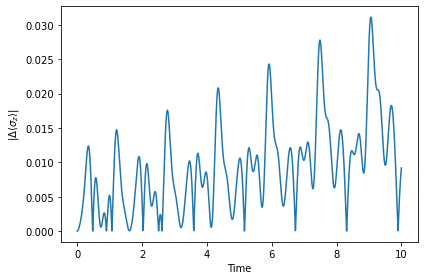

In [252]:
pl.figure()
pl.plot(t_drive_list, dsz)
pl.xlabel('Time')
pl.ylabel(r'$|\Delta\langle \sigma_z \rangle$|')
pl.tight_layout()
pl.show()

We notice that there is a growing error with time. This signals that the effective Hamiltonian is not exact, but there is a perturbative correction in $o(1/\omega)$. This means that there is a small energy scale correction, which manifests in processes taking a long time to appear. Notice that there are specific repeating times at which the error is zero.

### Strong drive

We consider a strong drive, namely we break the condition $\Delta / \omega \ll 1$

In [278]:
omega = 10.
Delta = 10.

With this parameter the effective Hamiltonian is $H_{\mathrm{eff}} \approx H_0 \mathcal J_0(2\Delta / \omega)$, namely with a non-perturbative renormalization of $J \rightarrow J_{\mathrm{eff}}$.

In [279]:
Jeff = J*sp.special.jv(0,2*Delta/omega)
print(Jeff)

0.22389077914123562


In [280]:
t_start = 0
t_stop = 20
dt = 0.01 # We choose it much smaller than the driving period
t_drive_list = np.arange(t_start,t_stop,dt) # Time list

psit_drive = []
psit_eff = []
psi = psi0 # Initial state
psieff = psi0
psit_drive.append(psi0)
psit_eff.append(psi0)
for t in t_drive_list[1:]:
    psi = np.dot(U(dt, J, Delta, omega, t), psi) # Apply the time evolution operator (Trotter)
    psieff = np.dot(U(dt, Jeff, 0., 0., 0.), psieff) # Effective dynamics
    psit_drive.append(psi)
    psit_eff.append(psieff)

sz_drive = [np.abs(psi[0])**2 - np.abs(psi[1])**2 for psi in psit_drive] 
sz_eff = [np.abs(psi[0])**2 - np.abs(psi[1])**2 for psi in psit_eff] 

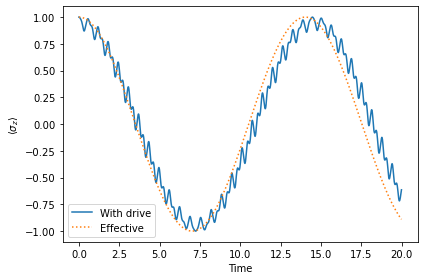

In [281]:
pl.figure()
pl.plot(t_drive_list, sz_drive, '-', label = r'With drive')
pl.plot(t_drive_list, sz_eff, ':', label = r'Effective')
pl.xlabel('Time')
pl.ylabel(r'$\langle \sigma_z \rangle$')
pl.legend()
pl.tight_layout()
pl.show()

1. We have (almost) captured the oscillation via the effective Bessel function renormalization
2. We see that the large oscillations already deviate a bit from the effective dynamics, signaling the need of higher perturbation theory accuracy
3. We see sub-oscillations that are not captured by $H_{\mathrm{eff}}$. This is the micromotion.

**Exercise 1**: Verify that the accuracy improves when increasing $\omega$ but keeping $J_{\mathrm{eff}}$ the same. Find a metric to define the accuracy and study the dependence with $\omega$.

**Exercise 2**: Show numerically that there is no dynamics when the parameters are chosen for the zeros of the Bessel function